In [ ]:
#Description : This is a sentiment analysis program that parses the tweets fetched from twitter using python

In [4]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
APIKey="8dECQw5LiASlmc8rDvRh4GjIX"
APISecretKey="skRSicS1Epn9kqszIPRBqdVhsmyQzFhiMUUYlqPyrHnHt7xZfQ"
AccessToken="1238413988188180480-jTRT4lDPTbBvalbRlUZ4Qgpag6wMdN"
AccessTokenSecret="60TzSvGL1NlurSVr8Lx3n2R2ZbmcHyvyNfScrLBcTmeYW"

In [6]:
# Twitter API credentials 
authenticate = tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(authenticate)

In [7]:
#Extract 100 tweets from the twitter user
posts= api.user_timeline(screen_name="Tesla", count=100, lang="en", tweet_mode="extended")
#print the last 5 tweets from the account
print("show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i)+') '+tweet.full_text+'\n')
  i=i+1

show the 5 recent tweets: 

1) RT @GreenMtnPower: GMP’s pioneering network of Tesla Powerwall batteries in customers’ homes delivers groundbreaking first-in-New-England b…

2) Configurator now live in Hungary 🇭🇺 &amp; Romania 🇷🇴

3) Cybertruck in NYC https://t.co/Q7JnSo1QoX

4) RT @ericrihlmann: Tesla Cybertruck in Times Square.

#cybertruck https://t.co/65BIn9WNsY

5) RT @elonmusk: Cybertruck prototype in New York this weekend



In [8]:
#create a dataframe with column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['tweets'])

#show the first 5 rows of data
df.head()

,tweets
0,RT @GreenMtnPower: GMP’s pioneering network of...
1,Configurator now live in Hungary 🇭🇺 &amp; Roma...
2,Cybertruck in NYC https://t.co/Q7JnSo1QoX
3,RT @ericrihlmann: Tesla Cybertruck in Times Sq...
4,RT @elonmusk: Cybertruck prototype in New York...


In [9]:
#clean the text 
# create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','', text) #tag remove @mentions
  text=re.sub(r'#','', text) # removing the '#' symbol
  text=re.sub(r'RT[\s]+','', text) #removing Retweets 
  text=re.sub(r'https?:\/\/\s+,','', text) #remove the Hyperlink
  return text
# cleaning the text
df['tweets']= df['tweets'].apply(cleanTxt)
     #show the cleaned Text
df

,tweets
0,: GMP’s pioneering network of Tesla Powerwall ...
1,Configurator now live in Hungary 🇭🇺 &amp; Roma...
2,Cybertruck in NYC https://t.co/Q7JnSo1QoX
3,: Tesla Cybertruck in Times Square.\n\ncybertr...
4,: Cybertruck prototype in New York this weekend
...,...
95,F
96,Do you want a sneak peek of our crash lab?\n\n...
97,: Get Tesla Solar plus Powerwall battery for 2...
98,_modi_ we're good


In [10]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of all the tweets
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

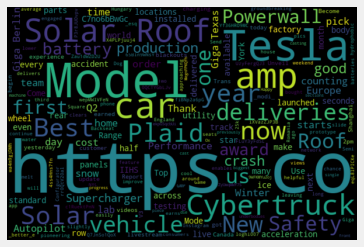

In [11]:
#Plot the Word Cloud
allWords= ' '.join([twts for twts in df['tweets']] )
wordcloud = WordCloud(width=600, height=400, random_state=18, max_font_size=123).generate(allWords)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
#Create a function to compute the negetive,neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negetive'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)
#Show the dataframe
df

,tweets,Subjectivity,Polarity,Analysis
0,: GMP’s pioneering network of Tesla Powerwall ...,0.000000,0.000000,Neutral
1,Configurator now live in Hungary 🇭🇺 &amp; Roma...,0.500000,0.136364,Positive
2,Cybertruck in NYC https://t.co/Q7JnSo1QoX,0.000000,0.000000,Neutral
3,: Tesla Cybertruck in Times Square.\n\ncybertr...,0.000000,0.000000,Neutral
4,: Cybertruck prototype in New York this weekend,0.454545,0.136364,Positive
...,...,...,...,...
95,F,0.000000,0.000000,Neutral
96,Do you want a sneak peek of our crash lab?\n\n...,0.000000,0.000000,Neutral
97,: Get Tesla Solar plus Powerwall battery for 2...,0.600000,0.027083,Positive
98,_modi_ we're good,0.600000,0.700000,Positive


In [13]:
#Print all of the positive tweets 
j=1
sortedDF =df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Positive'):
    print(str(j) +') '+sortedDF['tweets'][i])
    print()
    j=j+1

1) Configurator now live in Hungary 🇭🇺 &amp; Romania 🇷🇴

2) : Cybertruck prototype in New York this weekend

3) : Tesla Solar + Powerwall battery enables consumers to be their own utility

4) : Thank you  for this helpful and cool feature :-) https://t.co/FLuY3yFdSL

5) Model 3 earns Top Safety+ award from IIHS for third year in a row https://t.co/rr0QtV20al

6) :  The Tesla Solar Roof is slightly hydrophobic, so water, snow or ice slide off easily

7) Two years ago, we launched Dog Mode. Send us your best pics! https://t.co/iXVazZJP3B

8) : Happy New Year of the Ox! https://t.co/9WFKMYu2oj

9) Proud to have scored 100/100 in LGBTQ equality for the 6th year in a row 🏳️‍🌈 https://t.co/zz3PeKRRSL

10) Plaid Model X has the quickest acceleration of any SUV by far, at 2.5 seconds 0-60

11) Plaid Model S is the first production car to achieve 0-60 in under 2 seconds

12) You can play The Witcher 3, Cyberpunk &amp; many more

13) New Model S &amp; Model X just launched

Details https://t.co/

In [14]:
#Print the negetive Tweets
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending='False')
for i in range (0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negetive'):
   print(str(j)+') '+sortedDF['tweets'][i])
   print()
   j=j+1

1) Your Tesla will continue to improve long after you bought it https://t.co/wepMWlVFeN

2) : Tesla with Autopilot engaged now approaching 10 times lower chance of accident than average vehicle

3) Game on 🎮

📸 by  https://t.co/wa4m9gjDMh

4) It can cast front &amp; rear vehicle underbodies in a single piece each — down from 70+ parts for same sections previously

5) Order solar panels before the solar tax credit drops at the end of this year. Pair with Powerwall to experience no more blackouts!
https://t.co/gvX4KnG2ca

6) : In Tesla’s Q2 earnings call they dropped the little bombshell that Tesla's solar panels cost $1.49 per watt after incentiv…

7) Live roof &gt; Dead roof https://t.co/scCQ1UXUJb

8) Trans-Canada Supercharger route from Vancouver to Halifax is now open! 🇨🇦⚡
Over half the locations are V3 for the fastest charging speeds. https://t.co/42mnW3hNL5



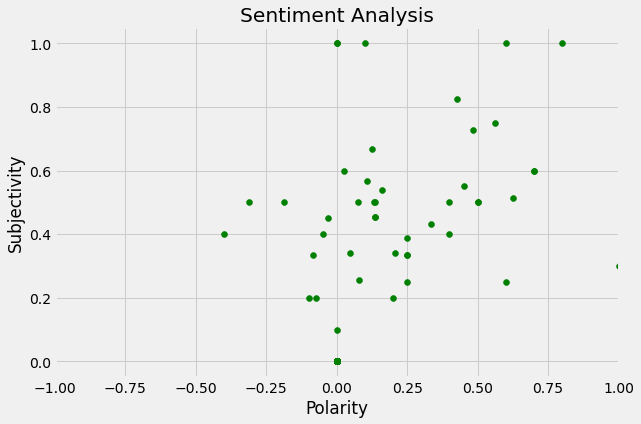

In [15]:
# plotting the scatter plot
plt.figure(figsize = (9,6))

for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Green')

plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [16]:
#Get the percentage of the Positive Tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweets']
round( (ptweets.shape[0] / df.shape[0])*100 ,1) 

34.0

In [17]:
#Get the percentage of the Negetive Tweets 
ntweets=df[df.Analysis=='Negetive']
ntweets=ntweets['tweets']
round( (ntweets.shape[0] / df.shape[0])*100 ,1) 

8.0

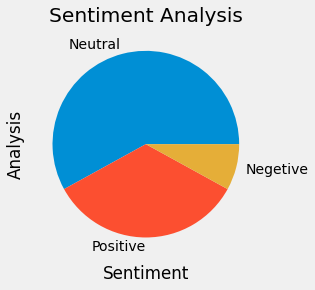

In [18]:
#Show the value count
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()